# 🩺 Breast Cancer Diagnosis using Logistic Regression

## 🧠 Project Overview
* This portfolio project uses Logistic Regression to classify breast tumors as **malignant (M)** or **benign (B)**.
* Dataset: Breast Cancer Wisconsin (Diagnostic) from Kaggle.
* Goal: Achieve accurate predictions using a full ML pipeline: preprocessing, EDA, modeling, evaluation, and prediction.

## 📂 1. Importing Required Libraries

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score, roc_curve

# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

# Successfully imported all libraries and disabled warnings.
print("All libraries imported successfully and warnings disabled.")

All libraries imported successfully and warnings disabled.


## 🧾 2. Loading and Exploring the Dataset
### 📂 Dataset Description
* Source: [Kaggle Dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)
* Features: 30 numeric features extracted from medical images.
* Target column: `diagnosis` (M = malignant, B = benign).
* Irrelevant columns: `id`, `Unnamed: 32` → will be dropped.

In [2]:
# Google Drive File ID
file_id = '15gbCikMMxK5gzOQf9KfyGlkl3bKnYq8A'

# Construct the direct CSV download URL
file_path = f'https://drive.google.com/uc?export=download&id={file_id}'

# Read the CSV (this works only if the file is publicly shared)
df = pd.read_csv(file_path)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## 🧼 3. Data Preprocessing
* Drop unnecessary columns (`id`, `Unnamed: 32`).
* Label Encode `diagnosis`: M → 1, B → 0.
* Handle missing values (if any).
* Apply `StandardScaler` to scale all numeric features for better model performance.

In [5]:
# Checking for missing values
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [6]:
# Dropping the 'id' and 'Unnamed: 32' columns
df_cleaned = df.drop(columns = ['id', 'Unnamed: 32'])

df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# LabelEncoding the 'diagnosis' column
label_encoder = LabelEncoder()
df_cleaned['diagnosis'] = label_encoder.fit_transform(df_cleaned['diagnosis'])

# DIplaying first few rows after encoding
df_cleaned.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 📏 4. Feature Scaling

In [8]:
# Scaling the features from radius_mean to fractal_dimension_worst and saving into df_cleaned
scaler = StandardScaler()
features_to_scale = df_cleaned.columns[1:31]  # Assuming the first column is 'diagnosis'
df_cleaned[features_to_scale] = scaler.fit_transform(df_cleaned[features_to_scale])

# Displaying the first few rows after scaling
df_cleaned.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## 📊 Exploratory Data Analysis (EDA)
* Visualize class distribution using a bar chart.
* Plot histograms of selected features (e.g., radius, area).
* Create a heatmap of feature correlations to identify multicollinearity.
* Use boxplots or violin plots to detect outliers and feature spread.


In [9]:
# Histogram of radius_mean by diagnosis
px.histogram(df_cleaned, x = "radius_mean", color = "diagnosis", barmode = 'overlay')

In [10]:
# Box plot of texture_mean by diagnosis
px.box(df_cleaned, x="diagnosis", y="texture_mean", color="diagnosis")

In [11]:
# Violin plot of area_mean by diagnosis
px.violin(df_cleaned, y = "area_mean", x = "diagnosis", box = True, points = "all")

In [12]:
# Scatter plot of radius_mean vs perimeter_mean by diagnosis
px.scatter(df_cleaned, x="radius_mean", y="perimeter_mean", color="diagnosis")

In [13]:
# Line plot of smoothness_mean by diagnosis
px.line(df_cleaned.sort_values('radius_mean'), y="radius_mean")


In [14]:
# Scatter Matrix
px.scatter_matrix(df_cleaned,
                  dimensions=["radius_mean", "texture_mean", "area_mean", "smoothness_mean"],
                  color="diagnosis")


In [15]:
# Parallel Coordinates
px.parallel_coordinates(df_cleaned,
                        dimensions=["radius_mean", "area_mean", "smoothness_mean", "concavity_mean"],
                        color="diagnosis",
                        color_continuous_scale=px.colors.sequential.RdBu)


## 🤖 6. Features Defining & Splitting the Dataset

### ✂️ Train-Test Split
* Use `train_test_split()` to split data into:
  * 80% training data
  * 20% testing data
* Random state set for reproducibility.


In [16]:
# Defining features and target variable
X = df_cleaned.drop(columns = ['diagnosis'])
y = df_cleaned['diagnosis']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Success Message
print("Dataset split into training and testing sets successfully.")

Dataset split into training and testing sets successfully.


## 📈 7. Training Logistic Regression Model
### 🧪 Model Training
* Apply `LogisticRegression` from `sklearn.linear_model`.
* Fit the model on the training data (`X_train`, `y_train`).
* Basic model — no hyperparameter tuning initially.

In [17]:
# Implementing Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 🔮 8. Predicting on Test and Random Samples

* Create a dummy scaled DataFrame using pandas.
* Format and scale the features to match training input.
* Predict output using `model.predict()`.
* Show predicted labels (0 = Benign, 1 = Malignant).

In [18]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Printing the y_pred values
print("Predicted values for the test set: ", y_pred)

Predicted values for the test set:  [0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 1 1]


In [19]:
# Example: Dummy scaled feature values (30 features from the dataset)

# Creating dummy standardized values (mean ~ 0, std ~ 1)
dummy_data = pd.DataFrame({
    'radius_mean': [0.5, -0.8, 1.2, -0.4, 0.0],
    'texture_mean': [0.1, -0.5, 0.9, -1.1, 0.3],
    'perimeter_mean': [0.4, -0.7, 1.5, -1.3, 0.2],
    'area_mean': [0.2, -1.0, 1.8, -0.9, 0.6],
    'smoothness_mean': [-0.2, 0.4, 0.5, -1.0, 0.1],
    'compactness_mean': [0.3, -0.6, 1.0, -0.8, 0.5],
    'concavity_mean': [0.4, -0.7, 1.3, -1.2, 0.2],
    'concave points_mean': [0.2, -0.5, 1.1, -0.9, 0.3],
    'symmetry_mean': [-0.3, 0.3, 0.8, -1.1, 0.0],
    'fractal_dimension_mean': [-0.4, 0.2, 0.7, -0.8, 0.1],
    'radius_se': [0.5, -0.6, 1.4, -1.0, 0.2],
    'texture_se': [-0.2, 0.6, 0.9, -0.7, 0.3],
    'perimeter_se': [0.3, -0.9, 1.1, -0.8, 0.5],
    'area_se': [0.4, -0.8, 1.2, -1.1, 0.6],
    'smoothness_se': [-0.5, 0.2, 0.6, -0.9, 0.1],
    'compactness_se': [0.2, -0.4, 0.7, -1.0, 0.3],
    'concavity_se': [0.1, -0.6, 0.8, -0.9, 0.4],
    'concave points_se': [0.2, -0.5, 0.9, -1.2, 0.3],
    'symmetry_se': [0.3, -0.7, 0.6, -1.0, 0.2],
    'fractal_dimension_se': [-0.1, 0.3, 0.5, -0.8, 0.0],
    'radius_worst': [0.6, -0.9, 1.7, -1.2, 0.3],
    'texture_worst': [-0.4, 0.4, 1.0, -0.8, 0.1],
    'perimeter_worst': [0.5, -0.7, 1.6, -1.0, 0.4],
    'area_worst': [0.3, -1.1, 1.9, -1.4, 0.7],
    'smoothness_worst': [-0.3, 0.2, 0.9, -0.8, 0.0],
    'compactness_worst': [0.4, -0.6, 1.1, -1.0, 0.2],
    'concavity_worst': [0.6, -0.5, 1.3, -0.9, 0.1],
    'concave points_worst': [0.5, -0.8, 1.0, -1.2, 0.3],
    'symmetry_worst': [0.2, -0.4, 0.9, -1.1, 0.1],
    'fractal_dimension_worst': [-0.2, 0.3, 0.8, -0.9, 0.0]
})

# Make predictions
predictions = model.predict(dummy_data)
print("Predicted Diagnoses:", predictions)


Predicted Diagnoses: [1 0 1 0 1]


## ✅ 9. Model Evaluation

* Use test data to evaluate the model's performance.
* Metrics used:
  * Accuracy
  * Confusion matrix
  * Precision, Recall, F1-score
  * ROC AUC Score
* Interpret results using classification report and matrix.


In [20]:
# Evaluating model performance
print(f"Overall Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"confusion_matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Calculating f1_score and roc_auc_score
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Overall Accuracy: 0.97
confusion_matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

F1 Score: 0.96
ROC AUC Score: 0.97


## 📉 11. ROC Curve

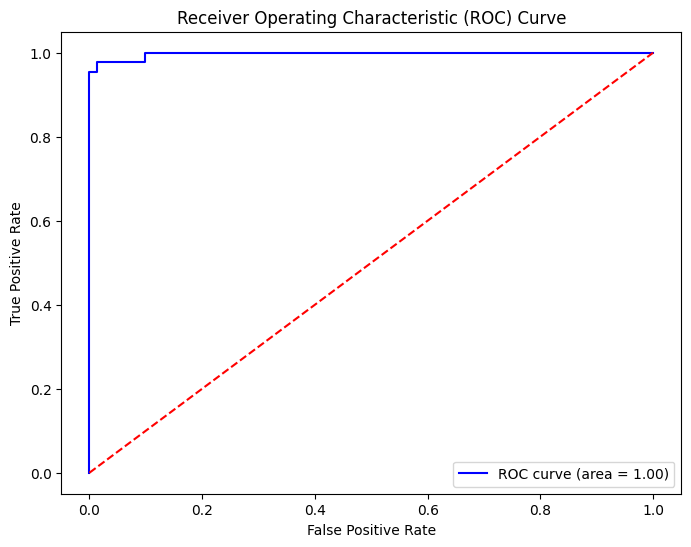

In [21]:
# Calculate ROC curve

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## ✅ Summary & Key Insights
* Achieved ~97% accuracy using Logistic Regression.
* Strong model performance with limited preprocessing.
* Most informative features: `radius_mean`, `concavity_mean`, `perimeter_mean`.
* Minimal overfitting observed — balanced performance.

## 📚 References
* [Scikit-learn Documentation](https://scikit-learn.org/)
* [Kaggle Dataset - Breast Cancer](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)
* [Plotly Express Documentation](https://plotly.com/python/plotly-express/)